<a href="https://colab.research.google.com/github/vijaygwu/IntroToDeepLearning/blob/main/RegressionPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Summary of a Regression Model in PyTorch

This code implements a complete workflow for training and evaluating a neural network on a regression task using synthetic data in PyTorch. The key steps include data preparation, model definition, training, evaluation, and visualization of results.

- **Data Preparation**: Generating synthetic data and converting it to a suitable format for training.
- **Model Definition**: A simple feedforward neural network with two hidden layers.
- **Training**: Using backpropagation and an optimizer to minimize the loss function over multiple epochs.
- **Evaluation**: Assessing the model’s performance on unseen test data.
- **Visualization**: Comparing the predicted outputs with the actual values to understand the model’s accuracy.

### 1. **Import Necessary Libraries**

```python
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
```

- **`torch`**: The core PyTorch library, used for tensor operations.
- **`torch.nn`**: A sub-library in PyTorch that provides tools to define and train neural networks. It includes layers, loss functions, and other utilities.
- **`torch.optim`**: Provides optimization algorithms like SGD and Adam, which are used to update the model parameters during training.
- **`matplotlib.pyplot`**: A plotting library used for visualizing data.
- **`numpy`**: A library for numerical computations, used here for generating and manipulating data.
- **`sklearn.model_selection.train_test_split`**: A utility to split the data into training and test sets.

### 2. **Create Synthetic Data**

```python
np.random.seed(42)
X = np.linspace(-2 * np.pi, 2 * np.pi, 1000).reshape(-1, 1)
y = np.sin(X) + 0.1 * np.random.randn(1000, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.Tensor(y_train)
X_test_tensor = torch.Tensor(X_test)
y_test_tensor = torch.Tensor(y_test)
```

- **Synthetic Data Generation**:
  - We generate 1,000 data points (`X`) evenly spaced between `-2π` and `2π`.
  - The target values (`y`) are generated using a sine function with added Gaussian noise (`np.random.randn`), simulating a real-world regression problem.

- **Train-Test Split**:
  - The dataset is split into training (80%) and test (20%) sets using `train_test_split`.

- **Convert to PyTorch Tensors**:
  - The data is converted from NumPy arrays to PyTorch tensors, which is necessary for feeding data into a PyTorch model.

### 3. **Define the Neural Network Model**

```python
class SimpleRegressionModel(nn.Module):
    def __init__(self):
        super(SimpleRegressionModel, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
```

- **Model Architecture**:
  - We define a simple feedforward neural network with three fully connected layers (`fc1`, `fc2`, and `fc3`).
  - **Input Layer**: Takes in 1 feature and outputs 64 features.
  - **Hidden Layers**: Two hidden layers, each with 64 neurons and ReLU activation functions.
  - **Output Layer**: Outputs a single value (the predicted value for the regression task).

- **Forward Pass**:
  - Defines how data flows through the network: from the input layer through the hidden layers to the output layer.
  - ReLU activations introduce non-linearity, which is crucial for learning complex patterns in the data.

### 4. **Instantiate the Model, Define Loss Function, and Optimizer**

```python
model = SimpleRegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
```

- **Model Instantiation**:
  - We create an instance of the `SimpleRegressionModel`, which will be used for training and evaluation.

- **Loss Function**:
  - **MSELoss (Mean Squared Error Loss)**: Commonly used for regression tasks, it measures the average squared difference between the predicted and actual values. The goal is to minimize this loss during training.

- **Optimizer**:
  - **SGD (Stochastic Gradient Descent)**: An optimization algorithm that updates the model’s parameters using the gradients computed during backpropagation. The learning rate (`lr=0.01`) controls the step size of these updates.

### 5. **Train the Model**

```python
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()

    y_pred = model(X_train_tensor)

    loss = criterion(y_pred, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')
```

- **Training Loop**:
  - **Epochs**: The number of times the entire training dataset is passed through the model. Here, we run 1,000 epochs.
  - **Model Training Mode (`model.train()`)**: Ensures that layers like dropout and batch normalization behave appropriately for training.
  - **Forward Pass**: The training data (`X_train_tensor`) is passed through the model to get predictions (`y_pred`).
  - **Loss Calculation**: The difference between the predictions and actual values is measured using the loss function.
  - **Zero Gradients**: Before computing the gradients for a new batch, we zero out the previous gradients to prevent accumulation.
  - **Backward Pass (`loss.backward()`)**: Computes the gradients of the loss with respect to the model parameters.
  - **Optimizer Step (`optimizer.step()`)**: Updates the model parameters using the computed gradients.
  - **Progress Monitoring**: Every 100 epochs, the current loss value is printed to track training progress.

### 6. **Evaluate the Model**

```python
model.eval()

with torch.no_grad():
    y_test_pred = model(X_test_tensor)

y_test_pred = y_test_pred.numpy()
y_test = y_test_tensor.numpy()
```

- **Evaluation Mode (`model.eval()`)**:
  - Ensures that layers like dropout and batch normalization behave correctly during evaluation (e.g., dropout is turned off).
  
- **No Gradient Calculation (`torch.no_grad()`)**:
  - Disables gradient computation during inference, which saves memory and computational resources.

- **Prediction**:
  - The model generates predictions (`y_test_pred`) for the test data.
  - The predictions and actual test values are converted back to NumPy arrays for plotting.

### 7. **Plot the Results**

```python
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Actual', color='blue')
plt.scatter(X_test, y_test_pred, label='Predicted', color='red')
plt.legend()
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.show()
```

- **Visualization**:
  - The actual test values (`y_test`) are plotted against the predicted values (`y_test_pred`) to visually assess the model’s performance.
  - **Scatter Plot**: Each point represents an (input, output) pair. Ideally, the red points (predicted) should be close to the blue points (actual).


In [2]:
# Import necessary libraries
import torch
import torch.nn as nn  # For defining neural network layers and the model
import torch.optim as optim  # For defining optimization algorithms like SGD, Adam
import matplotlib.pyplot as plt  # For plotting and visualization
import numpy as np  # For numerical operations and data generation
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets

# 1. Create Synthetic Data
# Generate synthetic data points using a sine function with some added noise
np.random.seed(42)  # Set a random seed for reproducibility
X = np.linspace(-2 * np.pi, 2 * np.pi, 1000).reshape(-1, 1)  # Generate 1000 points between -2pi and 2pi
y = np.sin(X) + 0.1 * np.random.randn(1000, 1)  # Apply sine function and add Gaussian noise

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the numpy arrays into PyTorch tensors
X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.Tensor(y_train)
X_test_tensor = torch.Tensor(X_test)
y_test_tensor = torch.Tensor(y_test)

# 2. Define the Neural Network Model
# We define a simple feedforward neural network with 2 hidden layers
class SimpleRegressionModel(nn.Module):
    def __init__(self):
        super(SimpleRegressionModel, self).__init__()
        # Define the layers: 1 input layer, 2 hidden layers, 1 output layer
        self.fc1 = nn.Linear(1, 64)  # Input layer with 1 input and 64 neurons
        self.fc2 = nn.Linear(64, 64)  # Hidden layer with 64 inputs and 64 neurons
        self.fc3 = nn.Linear(64, 1)  # Output layer with 64 inputs and 1 output (regression value)

    def forward(self, x):
        # Define the forward pass through the network
        x = torch.relu(self.fc1(x))  # Apply ReLU activation after the first layer
        x = torch.relu(self.fc2(x))  # Apply ReLU activation after the second layer
        x = self.fc3(x)  # Output layer without activation (for regression)
        return x

# 3. Instantiate the Model, Define Loss Function, and Optimizer
model = SimpleRegressionModel()  # Create an instance of the model
criterion = nn.MSELoss()  # Mean Squared Error loss for regression tasks
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent with learning rate 0.01


## Gradients:
Zeroing the gradients is crucial because it ensures that the gradients are computed independently for each mini-batch. This leads to correct and stable updates to the model's parameters during training. In PyTorch, this is achieved using `optimizer.zero_grad()` before the backward pass (`loss.backward()`).



### 1. **How Gradients Work in Backpropagation**:
   - In a neural network, the training process involves adjusting the model's weights to minimize a loss function, which measures how far the model's predictions are from the actual targets.
   - The gradients of the loss with respect to the model parameters (weights and biases) are computed using backpropagation. These gradients indicate the direction and magnitude of the changes needed in the model's parameters to reduce the loss.

### 2. **Accumulative Nature of Gradients**:
   - By default, PyTorch accumulates gradients whenever `loss.backward()` is called. This means that if you call `loss.backward()` multiple times without resetting the gradients, the new gradients will be added (accumulated) to the existing ones.
   - This accumulation is generally undesirable because it means that gradients from previous mini-batches will be incorrectly combined with gradients from the current mini-batch, leading to incorrect updates of the model parameters.

### 3. **Why Zero the Gradients**:
   - **To Prevent Accumulation**: Before computing the gradients for a new batch of data, you need to zero the gradients from the previous batch. This ensures that only the gradients from the current batch contribute to the weight updates.
   - **Correct Parameter Updates**: Zeroing the gradients ensures that each mini-batch in the training process starts with a clean slate. This leads to correct and stable updates to the model's parameters.

### 4. **Implementation in the Training Loop**:

In PyTorch, you typically zero the gradients right before performing the backpropagation for a new batch, as follows:

```python
# Zero the gradients before running the backward pass
optimizer.zero_grad()

# Forward pass: Compute predicted y by passing X to the model
y_pred = model(X_train_tensor)

# Compute the loss between predicted and actual y
loss = criterion(y_pred, y_train_tensor)

# Backward pass: Compute gradients of the loss with respect to model parameters
loss.backward()

# Update the model parameters based on the gradients
optimizer.step()
```

### 5. **What Happens If You Don't Zero the Gradients?**:
   - If you don't zero the gradients, the accumulated gradients will result in incorrect weight updates. This can lead to unstable training, with the model parameters potentially moving in the wrong direction, leading to poor convergence or divergence.



In [3]:
# 4. Train the Model
num_epochs = 1000  # Number of epochs (iterations over the entire dataset)
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode

    # Forward pass: Compute predicted y by passing X to the model
    y_pred = model(X_train_tensor)

    # Compute the loss between predicted and actual y
    loss = criterion(y_pred, y_train_tensor)

    # Zero the gradients before running the backward pass
    optimizer.zero_grad()

    # Backward pass: Compute gradients of the loss with respect to model parameters
    loss.backward()

    # Update the model parameters based on the gradients
    optimizer.step()

    # Print the loss every 100 epochs for monitoring
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')



Epoch [100/1000], Loss: 0.2294
Epoch [200/1000], Loss: 0.1468
Epoch [300/1000], Loss: 0.1288
Epoch [400/1000], Loss: 0.1224
Epoch [500/1000], Loss: 0.1171
Epoch [600/1000], Loss: 0.1119
Epoch [700/1000], Loss: 0.1065
Epoch [800/1000], Loss: 0.1011
Epoch [900/1000], Loss: 0.0956
Epoch [1000/1000], Loss: 0.0901



## Eval Mode:
Setting the model to evaluation mode using `model.eval()` is essential for ensuring that the model behaves correctly during inference. It ensures that layers like batch normalization and dropout function appropriately, providing consistent and reliable predictions. Forgetting to do this can result in incorrect and inconsistent evaluation results, which can mislead your understanding of the model’s performance.

### 1. **Behavior of Layers like Batch Normalization and Dropout**:
   - **Batch Normalization**:
     - During training, batch normalization layers normalize the activations of each mini-batch using the batch's mean and variance. The layer then maintains running estimates of these statistics to use during inference (evaluation).
     - During evaluation (inference), batch normalization uses these running averages instead of the batch statistics. This is because, during evaluation, you typically want the model to behave consistently, regardless of the specific batch of data it's processing.
     - **Without `model.eval()`**: If you don’t set the model to evaluation mode, batch normalization layers will continue to use the statistics of the current batch, leading to inconsistent results during evaluation.

   - **Dropout**:
     - Dropout is a regularization technique used during training to prevent overfitting. It randomly zeroes some of the activations in a layer during each forward pass, effectively forcing the network to learn redundant representations and thus generalize better.
     - During evaluation, you want the full network (without dropout) to be used, so all activations should be kept (i.e., dropout should be turned off).
     - **Without `model.eval()`**: If you don’t set the model to evaluation mode, dropout will continue to randomly zero out activations, leading to unpredictable and incorrect outputs during evaluation.

### 2. **Ensuring Consistent and Correct Predictions**:
   - **Evaluation Mode (`model.eval()`)**:
     - When you call `model.eval()`, PyTorch switches the model's behavior so that layers like batch normalization and dropout work as intended for inference:
       - Batch normalization uses running statistics instead of batch statistics.
       - Dropout is disabled, meaning no activations are dropped.
   - **Training Mode (`model.train()`)**:
     - Conversely, `model.train()` puts the model in training mode, which is the default mode. In this mode:
       - Batch normalization uses batch statistics.
       - Dropout is active, and some activations are randomly zeroed out.

### 3. **Example of Setting the Model to Evaluation Mode**:
   
   ```python
   model.eval()  # Set the model to evaluation mode
   
   with torch.no_grad():  # Disable gradient calculation for inference
       y_test_pred = model(X_test_tensor)  # Make predictions on the test set
   ```

   - **`model.eval()`**: Switches the model to evaluation mode, ensuring layers like batch normalization and dropout behave correctly during inference.
   - **`torch.no_grad()`**: Disables gradient computation, which saves memory and computational resources since gradients aren’t needed during evaluation.

### 4. **What Happens If You Don’t Set `model.eval()`?**:
   - If you don’t set the model to evaluation mode, the behavior of batch normalization and dropout layers will remain as they are during training. This can lead to:
     - **Inconsistent Predictions**: The model might give different outputs for the same input depending on the batch normalization statistics of the current batch.
     - **Unreliable Evaluation Metrics**: The performance metrics (e.g., accuracy, loss) computed during evaluation may not accurately reflect the model’s true performance, leading to misleading conclusions.


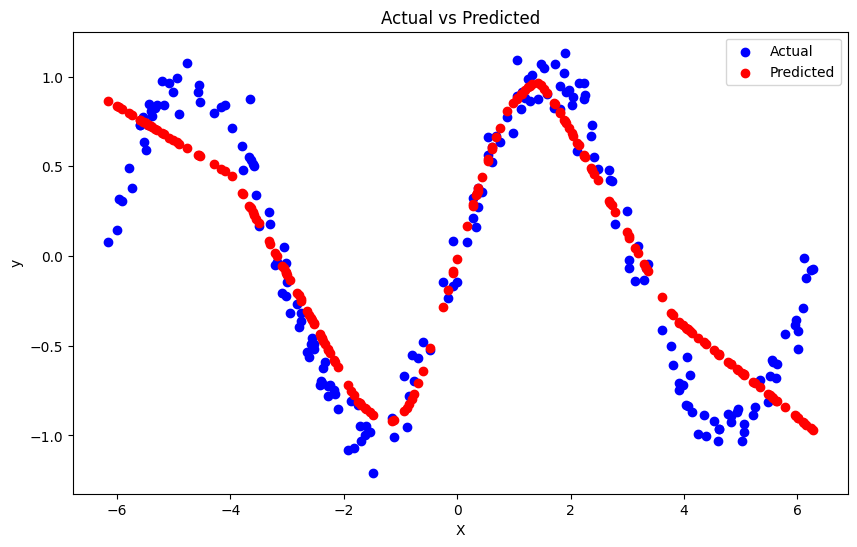

In [4]:
# 5. Evaluate the Model
model.eval()  # Set the model to evaluation mode

# Make predictions on the test set
with torch.no_grad():  # Disable gradient computation for evaluation
    y_test_pred = model(X_test_tensor)

# Convert predictions and actual values to numpy arrays for plotting
y_test_pred = y_test_pred.numpy()
y_test = y_test_tensor.numpy()

# 6. Plot the Results
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Actual', color='blue')  # Actual data points in blue
plt.scatter(X_test, y_test_pred, label='Predicted', color='red')  # Predicted data points in red
plt.legend()  # Show legend
plt.title('Actual vs Predicted')  # Title of the plot
plt.xlabel('X')  # X-axis label
plt.ylabel('y')  # Y-axis label
plt.show()  # Display the plot